<a href="https://colab.research.google.com/github/JackCurragh/RDG-Viewer/blob/main/RDG_Viewer_at_time_of_publication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDG-Viewer

Visualise Ribosome Decision Graphs in your browser using this colab notebook.

This notebook utilises the plotting functionality of the `RDG` python [package](https://github.com/JackCurragh/RDG). This package is under active development with the goal of being a basic toolkit for carrying out Ribosome Decision Graph based analysis.

In [1]:
#@title 1. Setup

#@markdown Install the required dependencies for Ribosome Decision Graph
#@markdown visualisation

#@markdown Run this step by clicking the <b>Play</b> button on the left
!pip uninstall RDG -y

!pip install -q sqlitedict matplotlib networkx gget gff2bed;
!pip install git+https://github.com/JackCurragh/RDG.git;

from RDG import plot, RDG

no_node_color_dict = {
    "edge_colors": {
        0: "#ffbb8d",
        1: "#ffeedd",
        2: "#ffd8be"
        },
    "node_colors": {
        "startpoint": "#000000",
        "endpoint": "#000000",
        "translation_start": "#00b050",
        "translation_stop": "#000000",
        "frameshift": "#000000",
    },
}

Found existing installation: RDG 0.1.6
Uninstalling RDG-0.1.6:
  Successfully uninstalled RDG-0.1.6
  Cloning https://github.com/JackCurragh/RDG.git to /tmp/pip-req-build-gljkatgx
  Running command git clone --filter=blob:none --quiet https://github.com/JackCurragh/RDG.git /tmp/pip-req-build-gljkatgx
  Resolved https://github.com/JackCurragh/RDG.git to commit 0752bb97a2033334026356da2c7a8f301d0ed0fa
  Preparing metadata (setup.py) ... done
  Created wheel for RDG: filename=RDG-0.1.6-py3-none-any.whl size=26647 sha256=a30e866f6beb9e968f99dd2deed162e71513a898c4623f66862c5f88cf99837a
  Stored in directory: /tmp/pip-ephem-wheel-cache-0_jgudw1/wheels/cf/bc/5c/dd2a0d1745436d8b3dec044357dac4f077a6a8bf18094ca537
Successfully built RDG


(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <Axes: xlabel='Coordinates (nt)'>)

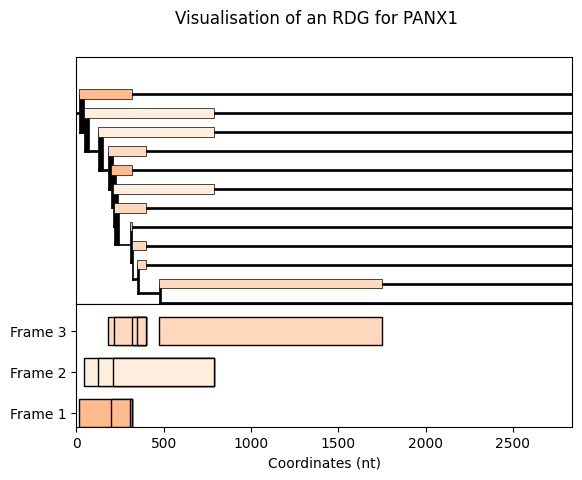

In [2]:
#@title 2. Build & Visualise Ribosome Decision Graph

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Depending on the rules/assumptions made during graph construction we
#@markdown will obtain greatly differnt graphs. Fill in the fields below to
#@markdown set the 'rules' for this graph as well as other visualisation paramaters

Locus_Name = "PANX1"  #@param {type:"string"}
Transcript_length = 2840 #@param {type:"integer"}

Allow_reinitiation = True #@param {type:"boolean"}

#@markdown Input Translon start and stop coordinates in the form
#@markdown "Start Position, Stop Position". Example  `100, 500`

#@markdown Leave a field blank if you do not require all 5 Translons

#@markdown <b>Note:</b> the quotation marks look after themselves
Translon_1 = "18,318"  #@param {type:"string"}
Translon_2 = "43,790"  #@param {type:"string"}
Translon_3 = "124,790"  #@param {type:"string"}
Translon_4 = "179,401"  #@param {type:"string"}
Translon_5 = "201,318"  #@param {type:"string"}
Translon_6 = "211,790"  #@param {type:"string"}
Translon_7 = "218,401"  #@param {type:"string"}
Translon_8 = "309, 318"  #@param {type:"string"}
Translon_9 = "317,401"  #@param {type:"string"}
Translon_10 = "347,401"  #@param {type:"string"}
Translon_11 = "473,1751"  #@param {type:"string"}


Translons = {
    "Translon 1": Translon_1,
    "Translon 2": Translon_2,
    "Translon 3": Translon_3,
    "Translon 4": Translon_4,
    "Translon 5": Translon_5,
    "Translon 6": Translon_6,
    "Translon 7": Translon_7,
    "Translon 8": Translon_8,
    "Translon 9": Translon_9,
    "Translon 110": Translon_10,
    "Translon 11": Translon_11,

    }

g = RDG(name=Locus_Name, locus_stop=Transcript_length)


for translon in Translons:
  if Translons[translon] != "":
    try:
      start_stop = [int(i) for i in Translons[translon].split(",")]
    except:
      raise Exception("Translon 1 Start or Stop Codon position is invalid")

    g.add_open_reading_frame(
        start_codon_position=int(start_stop[0]),
        stop_codon_position=int(start_stop[1]),
        reinitiation=Allow_reinitiation
        )

plot(g, color_dict=no_node_color_dict)

In [3]:
#@title 2 v2. Build Visualise Ribosome Decsion Graph

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Depending on the rules/assumptions made during graph construction we
#@markdown will obtain greatly differnt graphs. Fill in the fields below to
#@markdown set the 'rules' for this graph as well as other visualisation paramaters

Locus_Name = "ATF4"  #@param {type:"string"}
Transcript_length = 2000 #@param {type:"integer"}

Allow_reinitiation = False #@param {type:"boolean"}
#@markdown Distance after a stop required for reinitiation to be possible
Reinitiation_base_limit = 0 #@param {type:"integer"}

import ipywidgets as widgets

t1 = widgets.FloatRangeSlider(
    value=[486, 649],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 1:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t2 = widgets.FloatRangeSlider(
    value=[700, 891],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t3 = widgets.FloatRangeSlider(
    value=[888, 1943],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 3:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t4 = widgets.FloatRangeSlider(
    value=[0, 0],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 4:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t5 = widgets.FloatRangeSlider(
    value=[0, 0],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 5:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
display(t1, t2, t3, t4, t5)


FloatRangeSlider(value=(486.0, 649.0), continuous_update=False, description='Translon 1:', layout=Layout(heigh…

FloatRangeSlider(value=(700.0, 891.0), continuous_update=False, description='Translon 2:', layout=Layout(heigh…

FloatRangeSlider(value=(888.0, 1943.0), continuous_update=False, description='Translon 3:', layout=Layout(heig…

FloatRangeSlider(value=(0.0, 0.0), continuous_update=False, description='Translon 4:', layout=Layout(height='4…

FloatRangeSlider(value=(0.0, 0.0), continuous_update=False, description='Translon 5:', layout=Layout(height='4…

(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <Axes: xlabel='Coordinates (nt)'>)

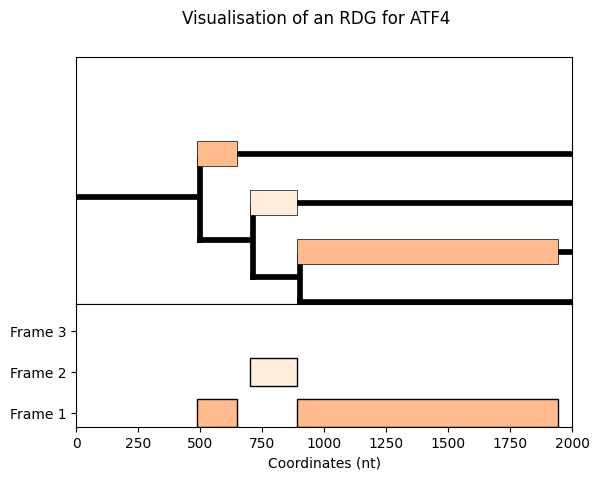

In [4]:
#@title Once you have set your Translon ranges it <b>Play</b> to render the graph!

Translons = {
    "Translon 1": t1.value,
    "Translon 2": t2.value,
    "Translon 3": t3.value,
    # "Translon 4": t4.value,
    # "Translon 5": t5.value,
    }


g = RDG(name=Locus_Name, locus_stop=Transcript_length)

for translon in Translons:
  if Translons[translon][0] != Translons[translon][1]:
    g.add_open_reading_frame(
        start_codon_position=int(Translons[translon][0]),
        stop_codon_position=int(Translons[translon][1]),
        reinitiation=Allow_reinitiation,
        )
plot(g, color_dict=no_node_color_dict, allow_reinitiation=Allow_reinitiation)

[(71, 148), (239, 679), (266, 679), (292, 834), (564, 824), (593, 679), (601, 834), (634, 834), (644, 679), (676, 834), (772, 834), (788, 1015), (866, 1015), (953, 1015), (1015, 1068), (1025, 1108), (1046, 1108), (1055, 1108), (1123, 1188), (1141, 1188), (1163, 1237), (1172, 1237), (1294, 1386), (1422, 1508), (1438, 1548), (1651, 1767), (1711, 1767), (1879, 1926), (1898, 1981), (1947, 2042), (2093, 2185)]


(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <Axes: xlabel='Coordinates (nt)'>)

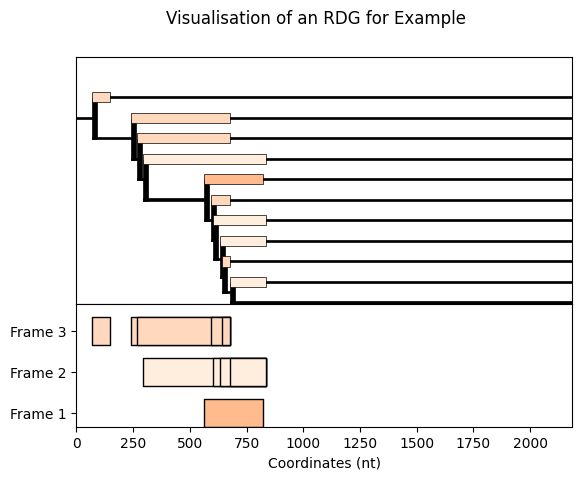

In [5]:
#@title 3. Build Visualise Ribosome Decsion Graph - From Sequence

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Provide transcript sequence and specified graph construction
#@markdown paramaters below:

from RDG.sequence_to_RDG import extract_translons

Locus_Name = "Example"  #@param {type:"string"}

#@markdown Transcript Sequence (No FASTA Header):
sequence = "CTGAAGCCGCGCGTGCGCAGAGCGGCGCGGGGTTACTGCGGCCCCGGCGTGGGTGGGGCGCTTGCAGGTCCATGCTCCCCGCGCAAGTGCTCGCCCCGCCCCCGGGGCCGCACCCACAGCCCCGGCTACCCCGGAGAAGCCTGACTTGAGAACCCTTTCTGCAGAGTCCCGGCAGTGCGGGAC TCCGGTAGCCGCCCCTCCGGTAGCCGCCCCTCCTGCCCCCGCGCCGCCGCCCTATATGTT GCCCGCCGCGGCCTCTGGGGCATGGAGCACGCTGCCCAGCCCTGGCGATGGCAACGGCGA CGGGGGTGGCGGAGGAGCGCCTGCTGGCCGCGCTCGCCTACCTGCAGTGCGCCGTGGGCT GCGCGGTCTTCGCGCGCAATCGTCAGACGAACTCAGTGTACGGCCGCCACGCGCTGCCCA GCCACAGGCTCCGAGTGCCGGCGCGGGCCGCCTGGGTGGTGCAGGAGCTGCCCTCGCTGG CCCTGCCGCTCTACCAGTACGCCAGCGAGTCCGCCCCGCGTCTCCGCAGCGCGCCCAACT GCATCCTCCTGGCCATGTTCCTCGTCCACTACGGGCATCGGAAATGTTGGTATGCAAGCA CTTGCAGTGTGCCTACATCCCAAATGCCAGCCCATGGTACCCATTGTCTGCCCGGATCTG AATCATGATTCCAAGACGCAGAGAGAAATTGCTGGGATTCGTTGTTCTTATTCATTGCTT GGCAACACTGCAGCTTCCAGGAGAATACCCACCTCACTGATGACACAACATCTGAATGCA CACTTACTGGCCAACACGTGCTTTGCTGTAAATCAGTATGAAGTCTTCCTAGGGGTCCTG GCCTGAATGAGATGAGAACCTTGGAGGCTGCTTTTGACTCATGTGAATGTCTTCCCCAGG AGTTAAGTGGGAGTGCTGGGGAGAGAGTGGCTTGAGGATGCACAGCCAGCATGACACTAC TATTATGTGATTACTGTCGACGTTCATAACCATAACTAATGACTAATTATGACTTTACCC TGGCGCACATGGTCAGAATGGAAACAAATAACAAGCTTTACAGTTTTTCCTGCTCTATTA AGGTGCTTAATTTACCCATTTCTGATGCGAGGAGGAAAGCCTATGCCACTGTTGGCGTGT ACAATGGCGATTATGTTCTGTACCTGTAACGGCTATTTGCAAAGCAGATACTTGAGCCAT TGTGCAGTGTATGCTGATGACTGGGTAACAGATCCCCGTTTTCTAATAGGTTTTGGCTTG TGGTTAACGGGCATGTTGATAAACATCCATTCAGATCATATCCTAAGGAATCTCAGAAAA CCAGGAGATACTGGATACAAAATACCAAGGGGAGGCTTATTTGAATACGTAACTGCAGCC AACTATTTTGGAGAAATCATGGAGTGGTGTGGCTATGCCCTGGCCAGCTGGTCTGTCCAA GGCGCGGCTTTTGCTTTCTTCACGTTTTGTTTTTTATCTGGTAGAGCAAAAGAGCATCAT GAGTGGTACCTCCGGAAATTTGAAGAGTATCCAAAGTTCAGAAAAATTATAATTCCATTT TTGTTTTAAGTGCGTTTTTCATGAAATTATCTTCAACTTGAAGCTTTCCAATGGCGCTTC TCTATGGACTTTGTAAATAAGTTATATCTTTGTAATTTTCCTGCTACTTTATCATTTTCA AGATGTCCTCTAGGAATTTTTTTTCTAGTAATTTTGCAATCTACCTAATAAGTACCTAAA TACGCTGAAATGGAGGTTGAATATCCTACTGTGTAACAGGTCAGAATTTCAAGCTCTGGG TAATAACTGCTGATATTTTTTCTAATTTCAAATTTACCTCTTTTGGCTATGTCTTGCCAA GTGTGTATGAGACTAGACTTTACAACTGTCTTTGATGGCATTTTCAGAACAATAAATGTC ACAATCCCTTCTATAGCCCCCTACAGTGATCTCTTCAAGGTCAACTGCAGTGTTGCTTCC CTCCCCCTATAGGGCTGGAATCTGTCTAGGAGCCCTCTCTCGGAGGCCACAGAGGCTGGG GGTAGCCATTGTGCAGTCATGGCCCGGGGGAAACTTGCCAACCTTCGTGTCAGGTGCTGT GTGTAAGTGGAGAACTTGGGGATAGAGGAGGAAGCTCCTCGTGGCCCTTC" #@param {type:"string"}

#@markdown Start Codons to Consider:
start_codons = "ATG" #@param {type:"string"}

minimum_length = 30 #@param {type:"integer"}

#@markdown Number of Start Codons at which the Ribosome will initiate:
Number_of_Starts = 10 #@param {type:"integer"}

#@markdown Max number of Translons on reinitiation path
reinitiation_limit = 0 #@param {type:"integer"}
Allow_reinitiation = False #@param {type:"boolean"}

translons = extract_translons(sequence, starts=start_codons.split(','), min_length=minimum_length)

print(translons)
dg = RDG(name=Locus_Name, locus_stop=len(sequence))

for translon_start, translon_stop in sorted(translons)[:Number_of_Starts]:
    dg.add_open_reading_frame(
        translon_start,
        translon_stop,
        reinitiation=Allow_reinitiation,
        upstream_limit=reinitiation_limit,
    )

plot(dg, color_dict=no_node_color_dict)

Finding transcripts for ACTL10


INFO:gget.utils:Fetching results from database: homo_sapiens_core_111_38
INFO:gget.utils:Total matches found: 1.
INFO:gget.utils:Query time: 7.97 seconds.
INFO:gget.utils:Requesting nucleotide sequences of all transcripts of ENSG00000288649 from Ensembl.


Generating RDG for ENSG00000288649


(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <Axes: xlabel='Coordinates (nt)'>)

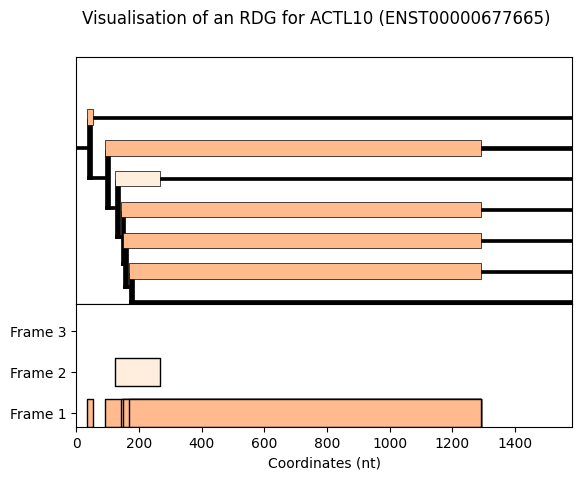

In [6]:
#@title 4. Build Visualise Ribosome Decsion Graph - From Gene Name

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Provide gene name and specified graph construction
#@markdown paramaters below:
import gget

organism = "homo_sapiens" #@param {type:"string"}
#@markdown <b>Please provide the organism name with an underscore eg "mus_musculus"</b>
#@markdown <br>

gene_name = "ACTL10" #@param {type:"string"}
#@markdown OR
ensembl_transcript_id = "" #@param {type: "string"}

#@markdown <br>

#@markdown Start Codons to Consider:
start_codons = "ATG, CTG,GTG" #@param {type:"string"}

#@markdown Number of Start Codons at which the Ribosome will initiate:
Number_of_Starts = 6 #@param {type:"integer"}

#@markdown Max number of Translons on reinitiation path
reinitiation_limit = 1 #@param {type:"integer"}
Allow_reinitiation = True #@param {type:"boolean"}
if ensembl_transcript_id == "":
  print(f"Finding transcripts for {gene_name}")
  options = gget.search([gene_name], organism, release=111)['ensembl_id']
  ensg = options[0]
  seq_results = gget.seq(ensg, translate=False, isoforms=True)

else:
  ensg = ensembl_transcript_id
  seq_results = gget.seq(ensg, translate=False)

print(f"Generating RDG for {ensg}")

gget_sequence = seq_results[1]

tx_id = seq_results[0].split(' ')[0][1:]
gene_name = f"{gene_name} ({tx_id})"

tx_info_df = gget.info([tx_id])[['exon_starts', 'exon_ends']]
exon_starts = tx_info_df.loc[tx_id, 'exon_starts']
exon_ends = tx_info_df.loc[tx_id, 'exon_ends']
base = (min(min(exon_starts), min(exon_ends)))
updated_starts = [i - base for i in exon_starts]
updated_ends = [i - base for i in exon_ends]
updated_exons = zip(updated_starts, updated_ends)

seqs = [gget_sequence[exon[0]:exon[1] + 1] for exon in updated_exons]
tx_seq = ''.join(seqs)

translons = extract_translons(tx_seq, starts=start_codons, min_length=0)
dg = RDG(name=gene_name, locus_stop=len(tx_seq))

for translon_start, translon_stop in sorted(translons)[:Number_of_Starts]:
    dg.add_open_reading_frame(
        translon_start,
        translon_stop,
        reinitiation=Allow_reinitiation,
        upstream_limit=reinitiation_limit,
    )
plot(dg, color_dict=no_node_color_dict)